In [1]:
df_eu  <-  read.csv(file="../data_hts/hts_eu_a10.csv", header=TRUE, sep=",", row.names =1 )
df_eu  <-  df_eu/1000
var_freq  <- 4    
var_start_year  <- 2000   
gdp_agg <- df_eu_sums <-  rowSums(df_eu)
gdp_agg  <- ts(gdp_agg, frequency = var_freq, start = var_start_year) 

In [17]:
library(TSclust)
library(data.table)
library(hts)  
library(forecast)
library(ggplot2)
library(dplyr)
library(gridExtra)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [18]:
sc_df  <-  apply(df_eu, 2, function(x) (x - mean(x))/sd(x) )

In [19]:
train  <-  sc_df

In [20]:
train  <- as.data.table(train)

In [21]:
corr_mat <- diss(train, "CORT", k=5)

In [22]:
diss_mat_dtw  <- matrix(0, nrow = dim(train)[2], ncol = dim(train)[2])
i <- j  <- a  <- 1
while (i < dim(train)[2]){
  for (j in (i+1):dim(train)[2]){ 
    # cat("(", j, i, ")")
    diss_mat_dtw[j,i] <-  corr_mat[a]
    a <- a+1
    }
  i <-i+1
  }
diss_mat_dtw  <- diss_mat_dtw + t(diss_mat_dtw)
diag(diss_mat_dtw) <- NA

In [23]:
closests_dtw <- c()
for (i in 1:dim(df_eu)[2]){
    closests_dtw  <-  c(closests_dtw, which.min(diss_mat_dtw[i,]) )
}

In [24]:
names_dtw <- c()
for (i in closests_dtw){
    names_dtw  <-  c(names_dtw, colnames(train)[i])
}

In [44]:
iii  <- 270

In [45]:
train  <- sc_df
train  <- as.data.table(train)

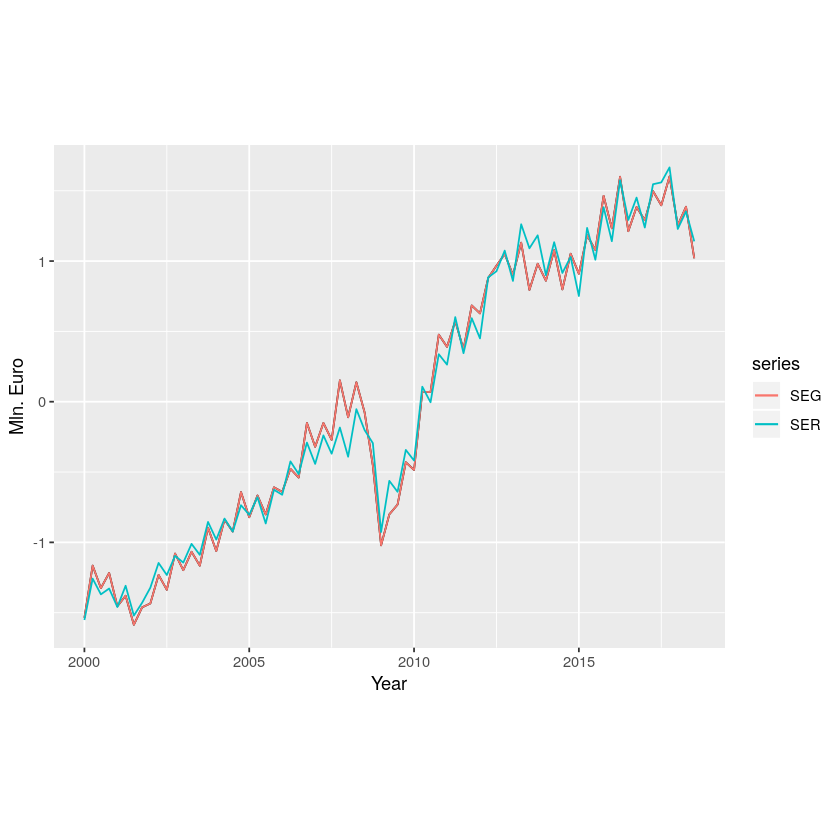

In [46]:
autoplot(ts(train[[names_dtw[iii]]], frequency = var_freq, start = var_start_year)) +
    autolayer(ts(train[[names_dtw[iii]]], frequency = var_freq, start = var_start_year), series=names_dtw[iii]) +
    autolayer(ts(train[[iii]], frequency = var_freq, start = var_start_year), series=colnames(train)[iii]) +
    xlab("Year") + ylab("Mln. Euro") +
    theme(aspect.ratio = 0.75)

In [47]:
train  <- df_eu
train  <- as.data.table(train)

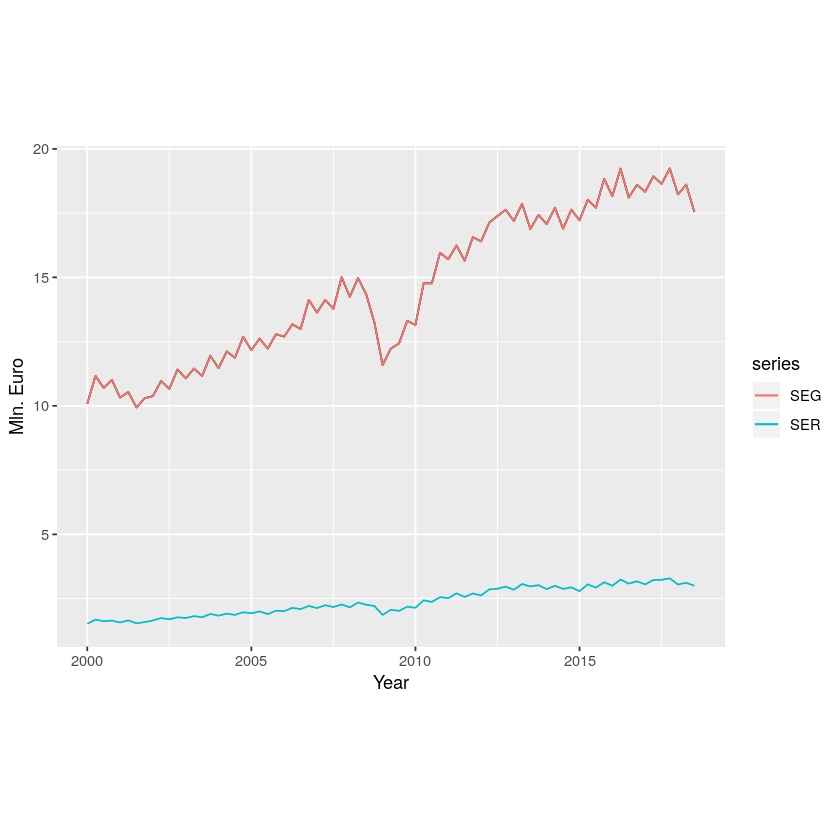

In [48]:
autoplot(ts(train[[names_dtw[iii]]], frequency = var_freq, start = var_start_year)) +
    autolayer(ts(train[[names_dtw[iii]]], frequency = var_freq, start = var_start_year), series=names_dtw[iii]) +
    autolayer(ts(train[[iii]], frequency = var_freq, start = var_start_year), series=colnames(train)[iii]) +
    xlab("Year") + ylab("Mln. Euro") +
    theme(aspect.ratio = 0.75)

In [50]:
saveRDS(names_dtw, "names_dtw_eu.rds")